<a href="https://colab.research.google.com/github/iamatul1214/NLP/blob/main/Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## In this session we will see how word embedding can work and simple letter predictions

In [1]:
## change to root dir
ROOT = "/content/drive/MyDrive/Letter_Embedding"

In [2]:
import os
!pwd
os.chdir(ROOT)
!pwd

/content
/content/drive/MyDrive/Letter_Embedding


In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf

## gathering the dataset

In [4]:
import urllib.request as req
try:
  URL="https://dataverse.harvard.edu/file.xhtml?fileId=4460084&version=5.0"
  filename, metadata = req.urlretrieve(URL, filename="./million-headlines.csv")
  print(f"{filename} is downloaded with the following metadata:\n{metadata}")
except Exception as e:
  print(f"{e} happened pls try downloading manually")

HTTP Error 403: Forbidden happened pls try downloading manually


In [5]:
filename = "abcnews-date-text.csv"
headlines = pd.read_csv(filename)
headlines

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
...,...,...
1226253,20201231,what abc readers learned from 2020 looking bac...
1226254,20201231,what are the south african and uk variants of ...
1226255,20201231,what victorias coronavirus restrictions mean f...
1226256,20201231,whats life like as an american doctor during c...


In [6]:
## We only need headline_text and not publish_date
headlines = headlines["headline_text"]
headlines.head()

0    aba decides against community broadcasting lic...
1       act fire witnesses must be aware of defamation
2       a g calls for infrastructure protection summit
3             air nz staff in aust strike for pay rise
4        air nz strike to affect australian travellers
Name: headline_text, dtype: object

In [7]:
## Now we will try to create a method which can yield two things- one is the input and other its output. So the first letter will be input and second one will be output
## such that- aba decides =  (a,b), (a,), (d,e) etc
## if the input will be a then system will predict b or ''.
def sliding_window(txt):
  N = len(txt)-1
  for i in range(N):
    yield txt[i],txt[i+1]      ## input, target values

In [8]:
import itertools as it
window = list(it.chain(*[sliding_window(txt) for txt in headlines[:10000]]))     ### to input first 10000 headlines
window

[('a', 'b'),
 ('b', 'a'),
 ('a', ' '),
 (' ', 'd'),
 ('d', 'e'),
 ('e', 'c'),
 ('c', 'i'),
 ('i', 'd'),
 ('d', 'e'),
 ('e', 's'),
 ('s', ' '),
 (' ', 'a'),
 ('a', 'g'),
 ('g', 'a'),
 ('a', 'i'),
 ('i', 'n'),
 ('n', 's'),
 ('s', 't'),
 ('t', ' '),
 (' ', 'c'),
 ('c', 'o'),
 ('o', 'm'),
 ('m', 'm'),
 ('m', 'u'),
 ('u', 'n'),
 ('n', 'i'),
 ('i', 't'),
 ('t', 'y'),
 ('y', ' '),
 (' ', 'b'),
 ('b', 'r'),
 ('r', 'o'),
 ('o', 'a'),
 ('a', 'd'),
 ('d', 'c'),
 ('c', 'a'),
 ('a', 's'),
 ('s', 't'),
 ('t', 'i'),
 ('i', 'n'),
 ('n', 'g'),
 ('g', ' '),
 (' ', 'l'),
 ('l', 'i'),
 ('i', 'c'),
 ('c', 'e'),
 ('e', 'n'),
 ('n', 'c'),
 ('c', 'e'),
 ('a', 'c'),
 ('c', 't'),
 ('t', ' '),
 (' ', 'f'),
 ('f', 'i'),
 ('i', 'r'),
 ('r', 'e'),
 ('e', ' '),
 (' ', 'w'),
 ('w', 'i'),
 ('i', 't'),
 ('t', 'n'),
 ('n', 'e'),
 ('e', 's'),
 ('s', 's'),
 ('s', 'e'),
 ('e', 's'),
 ('s', ' '),
 (' ', 'm'),
 ('m', 'u'),
 ('u', 's'),
 ('s', 't'),
 ('t', ' '),
 (' ', 'b'),
 ('b', 'e'),
 ('e', ' '),
 (' ', 'a'),
 ('a', 'w'),

In [9]:
## storing all the unique values in first place which is also the input values
unique_letters = pd.DataFrame(window)[0].unique()
unique_letters

array(['a', 'b', ' ', 'd', 'e', 'c', 'i', 's', 'g', 'n', 't', 'o', 'm',
       'u', 'y', 'r', 'l', 'f', 'w', 'p', 'z', 'k', 'v', 'j', 'h', 'q',
       '1', '0', 'x', '8', '3', '4', '5', '2', '6', '7', '9'],
      dtype=object)

In [10]:
mapping = {char:idx for idx, char in enumerate(unique_letters)}
mapping           ## This has mapped an unique number to each unique character including numerics, spaces and alphabets

{' ': 2,
 '0': 27,
 '1': 26,
 '2': 33,
 '3': 30,
 '4': 31,
 '5': 32,
 '6': 34,
 '7': 35,
 '8': 29,
 '9': 36,
 'a': 0,
 'b': 1,
 'c': 5,
 'd': 3,
 'e': 4,
 'f': 17,
 'g': 8,
 'h': 24,
 'i': 6,
 'j': 23,
 'k': 21,
 'l': 16,
 'm': 12,
 'n': 9,
 'o': 11,
 'p': 19,
 'q': 25,
 'r': 15,
 's': 7,
 't': 10,
 'u': 13,
 'v': 22,
 'w': 18,
 'x': 28,
 'y': 14,
 'z': 20}

In [11]:
## Let's just see the unique numbers assigned to our input values
[mapping[w[0]] for w in window]

[0,
 1,
 0,
 2,
 3,
 4,
 5,
 6,
 3,
 4,
 7,
 2,
 0,
 8,
 0,
 6,
 9,
 7,
 10,
 2,
 5,
 11,
 12,
 12,
 13,
 9,
 6,
 10,
 14,
 2,
 1,
 15,
 11,
 0,
 3,
 5,
 0,
 7,
 10,
 6,
 9,
 8,
 2,
 16,
 6,
 5,
 4,
 9,
 5,
 0,
 5,
 10,
 2,
 17,
 6,
 15,
 4,
 2,
 18,
 6,
 10,
 9,
 4,
 7,
 7,
 4,
 7,
 2,
 12,
 13,
 7,
 10,
 2,
 1,
 4,
 2,
 0,
 18,
 0,
 15,
 4,
 2,
 11,
 17,
 2,
 3,
 4,
 17,
 0,
 12,
 0,
 10,
 6,
 11,
 0,
 2,
 8,
 2,
 5,
 0,
 16,
 16,
 7,
 2,
 17,
 11,
 15,
 2,
 6,
 9,
 17,
 15,
 0,
 7,
 10,
 15,
 13,
 5,
 10,
 13,
 15,
 4,
 2,
 19,
 15,
 11,
 10,
 4,
 5,
 10,
 6,
 11,
 9,
 2,
 7,
 13,
 12,
 12,
 6,
 0,
 6,
 15,
 2,
 9,
 20,
 2,
 7,
 10,
 0,
 17,
 17,
 2,
 6,
 9,
 2,
 0,
 13,
 7,
 10,
 2,
 7,
 10,
 15,
 6,
 21,
 4,
 2,
 17,
 11,
 15,
 2,
 19,
 0,
 14,
 2,
 15,
 6,
 7,
 0,
 6,
 15,
 2,
 9,
 20,
 2,
 7,
 10,
 15,
 6,
 21,
 4,
 2,
 10,
 11,
 2,
 0,
 17,
 17,
 4,
 5,
 10,
 2,
 0,
 13,
 7,
 10,
 15,
 0,
 16,
 6,
 0,
 9,
 2,
 10,
 15,
 0,
 22,
 4,
 16,
 16,
 4,
 15,
 0,
 12,
 1,
 6,
 10,
 6,
 

In [12]:
## store the above unique number embeding into the input_integer array
input_int = np.array([mapping[w[0]] for w in window])
input_int

array([ 0,  1,  0, ..., 16, 16, 11])

In [13]:
## similary let's store the unique number embedding if the output values as well.
output_int = np.array([mapping[w[0]] for w in window])
output_int

array([ 0,  1,  0, ..., 16, 16, 11])

In [14]:
## Let's count the total number of letters we have
num_letters = len(mapping)
num_letters 

37

In [15]:
## Now let's create one embedding layer 
embedding = tf.keras.layers.Embedding(num_letters,2,input_length=1)   ## Embedding is a class in tf which takes total number of input, the size of sequence and input_length
model_emb = tf.keras.Sequential([embedding])

In [16]:
out_array = model_emb.predict(input_int)
out_array.shape     ## the output of this means there are 386880 vectors created of of shape 1,2 means 1 row and 2 cols.

(386880, 1, 2)

In [17]:
out_array

array([[[ 0.02756557,  0.03725829]],

       [[ 0.00547285, -0.01662787]],

       [[ 0.02756557,  0.03725829]],

       ...,

       [[ 0.0043308 ,  0.00733696]],

       [[ 0.0043308 ,  0.00733696]],

       [[ 0.03507551, -0.04969198]]], dtype=float32)

In [18]:
## let's create a index of the characters  array
idx_of_char = np.array([list(mapping.values())]).T
idx_of_char

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36]])

In [19]:
## Let's create a translator which can take the idx_of_chars and tell the value of it.
print(mapping)   

{'a': 0, 'b': 1, ' ': 2, 'd': 3, 'e': 4, 'c': 5, 'i': 6, 's': 7, 'g': 8, 'n': 9, 't': 10, 'o': 11, 'm': 12, 'u': 13, 'y': 14, 'r': 15, 'l': 16, 'f': 17, 'w': 18, 'p': 19, 'z': 20, 'k': 21, 'v': 22, 'j': 23, 'h': 24, 'q': 25, '1': 26, '0': 27, 'x': 28, '8': 29, '3': 30, '4': 31, '5': 32, '2': 33, '6': 34, '7': 35, '9': 36}


In [20]:
translator = {val:key for key, val in mapping.items()}
translator

{0: 'a',
 1: 'b',
 2: ' ',
 3: 'd',
 4: 'e',
 5: 'c',
 6: 'i',
 7: 's',
 8: 'g',
 9: 'n',
 10: 't',
 11: 'o',
 12: 'm',
 13: 'u',
 14: 'y',
 15: 'r',
 16: 'l',
 17: 'f',
 18: 'w',
 19: 'p',
 20: 'z',
 21: 'k',
 22: 'v',
 23: 'j',
 24: 'h',
 25: 'q',
 26: '1',
 27: '0',
 28: 'x',
 29: '8',
 30: '3',
 31: '4',
 32: '5',
 33: '2',
 34: '6',
 35: '7',
 36: '9'}

In [21]:
## Let's make the prediction by using the index of chars we created
preds = model_emb.predict(idx_of_char)
preds, preds.shape

(array([[[ 0.02756557,  0.03725829]],
 
        [[ 0.00547285, -0.01662787]],
 
        [[ 0.00740049, -0.01485414]],
 
        [[ 0.00124756, -0.02841835]],
 
        [[-0.04720382, -0.00067619]],
 
        [[ 0.01041798,  0.01708932]],
 
        [[ 0.03124316, -0.00559952]],
 
        [[ 0.03833796,  0.01724629]],
 
        [[-0.041681  ,  0.00683715]],
 
        [[ 0.00239386, -0.01922984]],
 
        [[-0.01573044, -0.01177977]],
 
        [[ 0.03507551, -0.04969198]],
 
        [[-0.04530376,  0.00086027]],
 
        [[ 0.00398871, -0.02583015]],
 
        [[-0.03855871, -0.00890015]],
 
        [[-0.02262237, -0.02651706]],
 
        [[ 0.0043308 ,  0.00733696]],
 
        [[-0.03838372,  0.0120971 ]],
 
        [[ 0.03165687, -0.01428397]],
 
        [[-0.03612672,  0.02474469]],
 
        [[-0.0214112 , -0.0302434 ]],
 
        [[-0.04519941, -0.00725542]],
 
        [[ 0.00936395, -0.04711772]],
 
        [[-0.03028234, -0.00114157]],
 
        [[-0.0078181 ,  0.04035782]],
 


In [22]:
preds   ## it is the output vector, first one will be placed on x axis and second one on y axis   

array([[[ 0.02756557,  0.03725829]],

       [[ 0.00547285, -0.01662787]],

       [[ 0.00740049, -0.01485414]],

       [[ 0.00124756, -0.02841835]],

       [[-0.04720382, -0.00067619]],

       [[ 0.01041798,  0.01708932]],

       [[ 0.03124316, -0.00559952]],

       [[ 0.03833796,  0.01724629]],

       [[-0.041681  ,  0.00683715]],

       [[ 0.00239386, -0.01922984]],

       [[-0.01573044, -0.01177977]],

       [[ 0.03507551, -0.04969198]],

       [[-0.04530376,  0.00086027]],

       [[ 0.00398871, -0.02583015]],

       [[-0.03855871, -0.00890015]],

       [[-0.02262237, -0.02651706]],

       [[ 0.0043308 ,  0.00733696]],

       [[-0.03838372,  0.0120971 ]],

       [[ 0.03165687, -0.01428397]],

       [[-0.03612672,  0.02474469]],

       [[-0.0214112 , -0.0302434 ]],

       [[-0.04519941, -0.00725542]],

       [[ 0.00936395, -0.04711772]],

       [[-0.03028234, -0.00114157]],

       [[-0.0078181 ,  0.04035782]],

       [[-0.04875692,  0.01743592]],

       [[ 0.

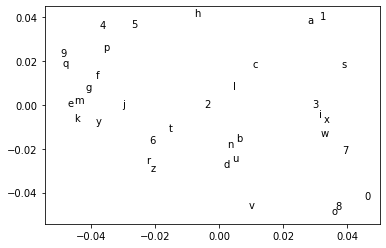

In [23]:
## Let's plot them 
import matplotlib.pyplot as plt
plt.scatter(preds[:, 0, 0], preds[:, 0, 1], alpha=0)
for i, idx in enumerate(idx_of_char):
  plt.text(preds[i, 0, 0], preds[i, 0, 1], translator[idx[0]])

plt.show()

In [24]:
## The above graph shows that the elements are scattered in the graph with the vectors which were predicted

In [25]:
### Now Let's create the Layers for training
LAYERS=[
        embedding,
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(num_letters, activation="softmax")    ## this is ANN now we have used 37 neurons here, used softmax because we want to see the probabilites 
]

model_pred = tf.keras.Sequential(LAYERS)

In [26]:
model_pred.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 2)              74        
                                                                 
 flatten (Flatten)           (None, 2)                 0         
                                                                 
 dense (Dense)               (None, 37)                111       
                                                                 
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


In [27]:
## We will use ADAM optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.05)

model_pred.compile(adam, 'categorical_crossentropy', metrics = ['accuracy'])

In [28]:
## Let's check prediction without training just for checking the shape
out_pred = model_pred.predict(input_int)
out_pred, out_pred.shape

(array([[0.02640981, 0.0273425 , 0.02731387, ..., 0.026542  , 0.02652803,
         0.02702619],
        [0.02716465, 0.02702006, 0.02695598, ..., 0.02721964, 0.02721204,
         0.02706921],
        [0.02640981, 0.0273425 , 0.02731387, ..., 0.026542  , 0.02652803,
         0.02702619],
        ...,
        [0.02691332, 0.02708091, 0.02708007, ..., 0.02693272, 0.02693078,
         0.02702456],
        [0.02691332, 0.02708091, 0.02708007, ..., 0.02693272, 0.02693078,
         0.02702456],
        [0.02728895, 0.02714584, 0.02687337, ..., 0.02757753, 0.02753963,
         0.02719684]], dtype=float32), (386880, 37))

In [29]:
out_pred.shape   ## so our output is also of 37 shape

(386880, 37)

In [30]:
## Since, we have used categorical crossentroppy so we will use one_hot_encoding on the output. If we don;t want to use one hot encoding then we can use sparse_categorical_entroppy as loss
from sklearn.preprocessing import OneHotEncoder

In [31]:
output_int.shape   ## it is just one dimension let's reshape it

(386880,)

In [32]:
output_int = output_int.reshape(-1, 1)
output_int.shape

(386880, 1)

In [33]:
to_predict = OneHotEncoder(sparse=False).fit_transform(output_int)

In [34]:
model_pred.fit(input_int, to_predict, epochs=25)

Epoch 1/25
12090/12090 [==============================] - 36s 3ms/step - loss: 0.0382 - accuracy: 0.9907
Epoch 2/25
12090/12090 [==============================] - 34s 3ms/step - loss: 0.0023 - accuracy: 0.9994
Epoch 3/25
12090/12090 [==============================] - 34s 3ms/step - loss: 0.0028 - accuracy: 0.9994
Epoch 4/25
12090/12090 [==============================] - 34s 3ms/step - loss: 8.8545e-04 - accuracy: 0.9998
Epoch 5/25
12090/12090 [==============================] - 33s 3ms/step - loss: 0.0022 - accuracy: 0.9996
Epoch 6/25
12090/12090 [==============================] - 34s 3ms/step - loss: 0.0016 - accuracy: 0.9997
Epoch 7/25
12090/12090 [==============================] - 33s 3ms/step - loss: 0.0010 - accuracy: 0.9998
Epoch 8/25
12090/12090 [==============================] - 34s 3ms/step - loss: 0.0013 - accuracy: 0.9998
Epoch 9/25
12090/12090 [==============================] - 33s 3ms/step - loss: 3.5437e-04 - accuracy: 0.9999
Epoch 10/25
12090/12090 [======================

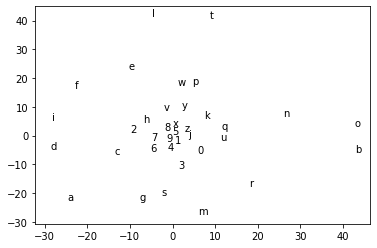

In [35]:
preds = model_emb.predict(idx_of_char)
plt.scatter(preds[:, 0, 0], preds[:, 0, 1], alpha=0)
for i, idx in enumerate(idx_of_char):
  plt.text(preds[i, 0, 0], preds[i, 0, 1], translator[idx[0]])

plt.show()

In [36]:
preds[:, 0, 1]

array([-22.332067  ,  -5.84824   ,  18.709366  ,  -4.801197  ,
        23.235023  ,  -6.5036316 ,   5.4059067 , -20.694548  ,
       -22.41737   ,   6.831096  ,  40.944305  ,   3.3765574 ,
       -27.28893   ,  -1.672742  ,   9.368767  , -17.607365  ,
        41.511635  ,  16.602734  ,  17.385769  ,  17.774302  ,
         1.6692802 ,   5.8984785 ,   8.75586   ,  -0.6896562 ,
         4.511829  ,   2.133392  ,  -2.5513036 ,  -6.10606   ,
         3.2607744 ,   1.8262018 , -11.421265  ,  -4.9308505 ,
         0.48154247,   1.1286175 ,  -5.2798166 ,  -1.7877015 ,
        -1.8029349 ], dtype=float32)

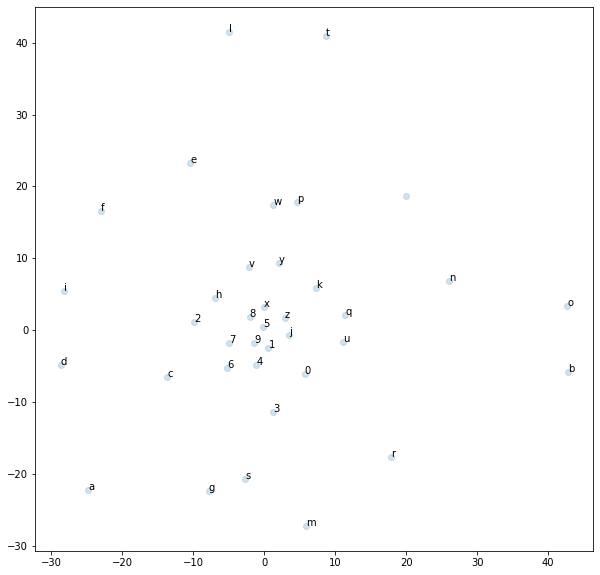

In [37]:
preds = model_emb.predict(idx_of_char)
plt.figure(figsize=(10,10))
plt.scatter(preds[:, 0, 0], preds[:, 0, 1], alpha=0.2)
for i, idx in enumerate(idx_of_char):
  plt.text(preds[i, 0, 0], preds[i, 0, 1], translator[idx[0]])
plt.show()

In [38]:
model_pred.predict([2])

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.33773925e-08, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.13432510e-37, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.89818713e-18,
        0.00000000e+00, 4.02762557e-15, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]], dtype=float32)